<a target="_blank" href="https://colab.research.google.com/github/sonder-art/ia_p25/blob/main/curso/temas/01_razonamiento/preferencias_sencillas.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# 1. Imports & Setup

In [34]:
# ================================================
# Celda 1: Importaciones y Configuración
# ================================================

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random
# Explicación:
# Importamos las bibliotecas para graficar y manipular datos.
# Solo necesitamos estas dos para representar las preferencias.


# 2: Funciones Auxiliares (Validador de la Base de Conocimientos)

In [35]:
# ================================================
# Celda 2: Funciones Auxiliares (Validador, etc.)
# ================================================

def validate_preferences(preferences, possible_places):
    """
    validate_preferences(preferences, possible_places):
        - preferences: Diccionario que representa las preferencias de cada persona.
        - possible_places: Lista de lugares posibles para ir a comer.

    Esta función se asegura de:
        1. Que haya al menos dos personas (2 <= n).
        2. Que cada persona proporcione una preferencia para cada lugar de possible_places.
        3. Que las preferencias coincidan con la lista de lugares conocidos.

    Retorna:
        - True, si todas las preferencias son válidas.
        - False, si hay algún error; imprime mensajes de error específicos.
    
    GOFAI / Explicación Simbólica:
        - Preparamos nuestra "Base de Conocimientos" con hechos:
          "Cada persona tiene 5 (o n) preferencias que corresponden a la lista de lugares."
        - Este método verifica la consistencia de esos hechos.
    """
    if len(preferences) < 2:
        print("ERROR: Se necesitan al menos 2 personas para tomar la decisión.")
        return False

    required_number_of_places = len(possible_places)
    for person_name, pref_list in preferences.items():
        if len(pref_list) != required_number_of_places:
            print(f"ERROR: La persona '{person_name}' no proporcionó exactamente "
                  f"{required_number_of_places} preferencias.")
            return False
        
        for place in pref_list:
            if place not in possible_places:
                print(f"ERROR: La persona '{person_name}' incluyó un lugar desconocido '{place}'.")
                return False

    #print("¡Todas las preferencias han sido validadas correctamente!")
    return True

def visualize_preferences(preferences, possible_places):
    """
    Muestra dos gráficas de barras:
    1) Conteo de cuántas veces cada lugar es la primera preferencia.
    2) Conteo de cuántas veces cada lugar es la última preferencia.

    GOFAI / Explicación:
        - Aunque trabajamos con un sistema simbólico de inferencia,
          tener estadísticas básicas de primera y última opción nos 
          da una visión clara de extremos.
    """
    # Inicializar contadores
    first_choice_count = {place: 0 for place in possible_places}
    last_choice_count = {place: 0 for place in possible_places}

    for person, pref_list in preferences.items():
        # Conteo de primera preferencia
        first_choice_count[pref_list[0]] += 1
        # Conteo de última preferencia
        last_choice_count[pref_list[-1]] += 1
    
    # --- Gráfica para la primera preferencia ---
    fig, ax = plt.subplots(1, 2, figsize=(12,5))

    # Subplot: primera preferencia
    places = list(first_choice_count.keys())
    counts_first = [first_choice_count[p] for p in places]
    ax[0].bar(places, counts_first, color='lightgreen', edgecolor='black')
    ax[0].set_xlabel("Lugares")
    ax[0].set_ylabel("Conteo")
    ax[0].set_title("Veces que cada lugar es PRIMERA opción")
    for i, v in enumerate(counts_first):
        ax[0].text(i, v + 0.1, str(v), ha='center')

    # Subplot: última preferencia
    counts_last = [last_choice_count[p] for p in places]
    ax[1].bar(places, counts_last, color='salmon', edgecolor='black')
    ax[1].set_xlabel("Lugares")
    ax[1].set_ylabel("Conteo")
    ax[1].set_title("Veces que cada lugar es ÚLTIMA opción")
    for i, v in enumerate(counts_last):
        ax[1].text(i, v + 0.1, str(v), ha='center')

    plt.tight_layout()
    plt.show()

def plot_all_ranks_distribution(preferences, possible_places):
    """
    Muestra cuántas veces cada lugar aparece en cada posición de preferencia.
    Creará una gráfica de barras agrupadas (una barra por posición para cada lugar).
    """
    n_places = len(possible_places)
    # Inicializamos un contador para cada lugar en cada posición
    rank_count = {}
    for place in possible_places:
        for rank_pos in range(n_places):
            rank_count[(place, rank_pos)] = 0

    # Contamos cuántas veces cada lugar aparece en cada posición
    for person_name, pref_list in preferences.items():
        for i, place in enumerate(pref_list):
            rank_count[(place, i)] += 1

    # Graficar
    fig, ax = plt.subplots(figsize=(10,5))
    x = np.arange(len(possible_places))
    bar_width = 0.1
    colors = plt.cm.viridis(np.linspace(0,1,n_places))

    for rank_pos in range(n_places):
        counts = [rank_count[(place, rank_pos)] for place in possible_places]
        ax.bar(x + rank_pos*bar_width, counts, width=bar_width, color=colors[rank_pos],
               label=f"Posición {rank_pos+1}")

    ax.set_xticks(x + bar_width*(n_places-1)/2)
    ax.set_xticklabels(possible_places)
    ax.set_xlabel("Lugares")
    ax.set_ylabel("Frecuencia (posiciones)")
    ax.set_title("Distribución de Lugares por TODAS las Posiciones de Preferencia")
    ax.legend()
    plt.show()

def compute_average_rank(preferences, possible_places):
    """
    Calcula el ranking promedio de cada lugar.
    Un ranking bajo (cercano a 1) es más popular (mejor).
    """
    place_sums = {place: 0 for place in possible_places}
    place_counts = {place: 0 for place in possible_places}
    
    for person, prefs in preferences.items():
        for rank_pos, place in enumerate(prefs):
            # (rank_pos + 1) => 1 indica mejor posición, 
            # 2 la siguiente, etc.
            place_sums[place] += (rank_pos + 1)
            place_counts[place] += 1
    
    place_avg = {}
    for place in possible_places:
        if place_counts[place] > 0:
            place_avg[place] = place_sums[place] / place_counts[place]
        else:
            place_avg[place] = None
    
    return place_avg

def visualize_average_rank(preferences, possible_places):
    """
    Calcula y grafica el ranking promedio de cada lugar.
    """
    avg_ranks = compute_average_rank(preferences, possible_places)
    # Ordenar de menor a mayor (menor = mejor)
    sorted_places = sorted(avg_ranks.items(), key=lambda x: x[1])
    
    labels = [sp[0] for sp in sorted_places]
    values = [sp[1] for sp in sorted_places]

    plt.figure(figsize=(8,4))
    bars = plt.bar(labels, values, color='lightblue', edgecolor='black')
    plt.xlabel("Lugares")
    plt.ylabel("Ranking promedio")
    plt.title("Ranking promedio (1 = lugar más popular)")
    # Mostrar valor encima de cada barra
    for b in bars:
        height = b.get_height()
        plt.text(b.get_x() + b.get_width()/2, height + 0.05,
                 f"{height:.2f}", ha='center')

    plt.ylim(0, max(values) + 1)
    plt.show()




In [36]:
def validate_preferences(preferences, possible_places):
    """
    Verifica que las preferencias sean válidas:
    - Al menos 2 personas
    - Mismo número de preferencias que lugares
    - Lugares válidos
    """
    if len(preferences) < 2:
        print("ERROR: Se necesitan al menos 2 personas.")
        return False

    required_places = len(possible_places)
    for person, prefs in preferences.items():
        if len(prefs) != required_places:
            print(f"ERROR: {person} no tiene {required_places} preferencias.")
            return False
        for place in prefs:
            if place not in possible_places:
                print(f"ERROR: {person} incluyó un lugar desconocido {place}.")
                return False

    return True


def generate_random_preferences(num_people, possible_places):
    """
    Genera un diccionario de preferencias aleatorias para 'num_people' personas.
    Cada persona tendrá una permutación de possible_places.
    """
    preferences = {}
    for i in range(num_people):
        person_name = f"Persona_{i+1}"
        random_prefs = random.sample(possible_places, len(possible_places))
        preferences[person_name] = random_prefs
    return preferences

def compute_borda_scores(preferences, possible_places):
    """
    Calcula la puntuación Borda de cada lugar en 'possible_places' 
    dadas las preferencias (diccionario persona -> lista de lugares).

    Borda (versión simple):
    - Si hay n lugares, la 1ra preferencia (posición 0) recibe n-1 puntos,
      la 2da preferencia (posición 1) recibe n-2, etc.
    - Retorna un diccionario con {lugar: puntaje_borda}.
    """
    n = len(possible_places)
    borda_scores = {place: 0 for place in possible_places}

    for person, ranking in preferences.items():
        for i, place in enumerate(ranking):
            borda_scores[place] += (n - 1 - i)
    
    return borda_scores


def borda_winner(preferences, possible_places):
    """
    Determina el ganador Borda: el lugar con la mayor puntuación total.
    """
    scores = compute_borda_scores(preferences, possible_places)
    return max(scores, key=scores.get)


def pairwise_matrix(preferences, possible_places):
    """
    Retorna una matriz (diccionario) pairwise_count[x][y] que indica
    cuántas personas prefieren 'x' sobre 'y' en un duelo directo (x vs. y).
    """
    pairwise_count = {x: {y: 0 for y in possible_places} for x in possible_places}

    for person, ranking in preferences.items():
        # Si x aparece antes que y en 'ranking', se incrementa pairwise_count[x][y].
        for i, x in enumerate(ranking):
            for j in range(i+1, len(ranking)):
                y = ranking[j]
                pairwise_count[x][y] += 1

    return pairwise_count


def find_condorcet_winner(preferences, possible_places):
    """
    Chequea si existe un lugar que gane contra todos los demás en duelos directos 
    (Condorcet Winner).
    Retorna:
      - El lugar que es Condorcet Winner, si existe.
      - None, si no hay tal lugar (hay un ciclo o nadie domina a todos).
    """
    pw_matrix = pairwise_matrix(preferences, possible_places)

    for x in possible_places:
        wins_all = True
        for y in possible_places:
            if x == y:
                continue
            if pw_matrix[x][y] <= pw_matrix[y][x]:
                wins_all = False
                break
        if wins_all:
            return x
    return None

def analyze_engine_coincidence(df_sims):
    """
    Dado un DataFrame con columnas (al menos):
      - 'winner_engine': Ganador según el inference_engine.
      - 'winner_borda': Ganador Borda.
      - 'winner_condorcet': Ganador Condorcet (o None si no existe).

    Retorna un dict con:
      - 'engine_borda_coincidence': % de simulaciones donde engine == Borda.
      - 'engine_condorcet_coincidence': % de simulaciones donde engine == Condorcet,
        en aquellas simulaciones que tienen un condorcet winner (no None).
    """
    total_sims = len(df_sims)
    if total_sims == 0:
        return {
            "engine_borda_coincidence": 0.0,
            "engine_condorcet_coincidence": 0.0
        }

    same_borda = (df_sims["winner_engine"] == df_sims["winner_borda"]).sum()
    coincide_borda_pct = same_borda / total_sims

    df_condorcet = df_sims.dropna(subset=["winner_condorcet"])  # simulaciones c/ condorcet
    if len(df_condorcet) > 0:
        same_condorcet = (df_condorcet["winner_engine"] == df_condorcet["winner_condorcet"]).sum()
        coincide_condorcet_pct = same_condorcet / len(df_condorcet)
    else:
        coincide_condorcet_pct = 0.0

    return {
        "engine_borda_coincidence": coincide_borda_pct,
        "engine_condorcet_coincidence": coincide_condorcet_pct
    }


In [37]:
def analyze_winner_volatility(df_sims):
    """
    Calcula cuántas veces el 'winner' cambia entre una simulación y la siguiente
    (simulations consecutivas según 'simulation_id').
    
    Parámetros:
        df_sims: DataFrame con columnas ["simulation_id", "winner"].
                 Debe estar al menos ordenable por 'simulation_id'.
    
    Retorna:
        volatility (float): Valor entre 0 y 1 indicando el porcentaje de cambios
                            de un ganador a otro entre corridas consecutivas.
    """
    # Asegurarse de que esté ordenado por simulation_id
    df_ordered = df_sims.sort_values("simulation_id")
    
    winners = df_ordered["winner"].values
    changes = 0
    
    for i in range(1, len(winners)):
        if winners[i] != winners[i-1]:
            changes += 1
    
    # Calcular fracción de cambios
    if len(winners) > 1:
        volatility = changes / (len(winners) - 1)
    else:
        volatility = 0
    
    return volatility

def compute_hhi_winners(df_sims):
    """
    Calcula el índice Herfindahl-Hirschman (HHI) para la distribución de ganadores.
    
    Parámetros:
        df_sims: DataFrame con columna ["winner"].
        
    Retorna:
        hhi (float): suma de (proporción de victorias de cada lugar)^2
    """
    winner_counts = df_sims["winner"].value_counts()
    total = winner_counts.sum()
    proportions = winner_counts / total
    hhi = (proportions**2).sum()
    return hhi

def compute_winner_utility(prefs, winner, possible_places):
    """
    Dada una asignación de preferencias `prefs` (diccionario persona -> lista de lugares),
    y sabiendo quién ganó (`winner`), calcula la utilidad agregada de ese ganador según:
       Utilidad(persona) = N - index_del_winner_en_sus_preferencias
    donde N = len(possible_places).
    
    Retorna:
        total_utility (int): La suma de utilidades de todas las personas.
    """
    N = len(possible_places)
    total_utility = 0

    for person, ranking in prefs.items():
        index_of_winner = ranking.index(winner)
        total_utility += (N - index_of_winner)
    
    return total_utility

def plot_winner_utility_distribution(df_sims):
    """
    Muestra un histograma de la columna 'winner_utility'.
    Parámetros:
        df_sims: DataFrame con al menos la columna "winner_utility".
    """
    plt.figure(figsize=(7, 4))
    df_sims["winner_utility"].plot(kind="hist", bins=20, color="lightblue", edgecolor="black")
    plt.title("Distribución de la Utilidad Agregada del Ganador")
    plt.xlabel("Utilidad Agregada")
    plt.ylabel("Frecuencia")
    plt.show()
    
    # Podemos imprimir además estadísticas básicas
    mean_util = df_sims["winner_utility"].mean()
    std_util = df_sims["winner_utility"].std()
    print(f"Utilidad media: {mean_util:.2f}, desvío estándar: {std_util:.2f}")

import seaborn as sns
import seaborn as sns

def boxplot_winner_utility_by_place(df_sims):
    """
    Crea un boxplot de 'winner_utility' segmentado por 'winner'.
    Parámetros:
        df_sims: DataFrame con columnas ["winner", "winner_utility"].
    """
    plt.figure(figsize=(7,5))
    sns.boxplot(x="winner", y="winner_utility", data=df_sims, palette="pastel")
    plt.title("Distribución de la Utilidad del Ganador, Segmentada por Lugar Ganador")
    plt.xlabel("Lugar Ganador")
    plt.ylabel("Utilidad Agregada")
    plt.show()
    
def correlation_heatmap(df_sims):
    """
    Crea un mapa de calor (heatmap) de las correlaciones entre las columnas numéricas
    del DataFrame df_sims.
    """
    numeric_df = df_sims.select_dtypes(include=[float, int])  # solo columnas numéricas
    corr_matrix = numeric_df.corr()
    
    plt.figure(figsize=(8,6))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Matriz de Correlación de Métricas de Simulación")
    plt.show()

def summary_by_winner(df_sims):
    """
    Retorna un DataFrame resumen con estadísticas agregadas por cada lugar que ganó.
    - count (# de victorias)
    - mean y std de winner_utility
    - mean de tie_in_first_pref (qué fracción de las veces ganó cuando hubo empate)
    
    Ajusta las columnas según tus necesidades.
    """
    # Verificamos cuáles columnas existen
    agg_dict = {}
    if "winner_utility" in df_sims.columns:
        agg_dict["winner_utility"] = ["mean", "std", "min", "max"]
    if "tie_in_first_pref" in df_sims.columns:
        agg_dict["tie_in_first_pref"] = ["mean"]
    
    # Groupby por 'winner'
    summary = df_sims.groupby("winner").agg(agg_dict)
    
    return summary


In [44]:
# ================================================
# Celda 3: Inference Engine (Esqueleto IF-THEN)
# ================================================

def inference_engine(preferences, possible_places, preference_weights):
    """
    Decides the destination based on weighted preferences.
    
    Args:
        preferences: Dictionary with each person's ranked preferences
        possible_places: List of possible destinations
        preference_weights: Dictionary with weights for each preference position
                          e.g., {0: 1.0, 1: 0.7, 2: 0.5, ...}
    
    Returns:
        String with the selected destination
    """
    # Initialize score counter for each destination
    place_scores = {place: 0.0 for place in possible_places}
    
    # Calculate weighted score for each destination
    for person, pref_list in preferences.items():
        for position, place in enumerate(pref_list):
            # Get weight for this preference position (default to 0.1 if not specified)
            position_weight = preference_weights.get(position, 0.1)
            place_scores[place] += position_weight
    
    # Find destination with highest score
    winner = max(place_scores.items(), key=lambda x: x[1])[0]
    
    # Show final scores for transparency
    # print("\nFinal scores:")
    # for place, score in sorted(place_scores.items(), key=lambda x: x[1], reverse=True):
    #     print(f"{place}: {score:.2f} points")
    
    return winner

In [39]:
def compute_winner_utility(prefs, winner, possible_places):
    """
    Calcula la utilidad total del 'winner':
    Utilidad(persona) = N - index(winner), donde N = len(possible_places).
    """
    N = len(possible_places)
    total_utility = 0
    for person, ranking in prefs.items():
        index_of_winner = ranking.index(winner)
        total_utility += (N - index_of_winner)
    return total_utility


def run_single_simulation(num_people, possible_places):
    """
    1. Genera preferencias aleatorias.
    2. Valida.
    3. Llama a inference_engine para decidir su ganador (winner_engine).
    4. Calcula Borda y Condorcet.
    5. Calcula la 'winner_utility' según el engine.
    6. Retorna un diccionario con todos los datos (columnas) a guardar en el DataFrame.
    """
    # (1) Generar preferencias
    prefs = generate_random_preferences(num_people, possible_places)

    # (2) Validar
    valid = validate_preferences(prefs, possible_places)
    if not valid:
        return None

    # (3) Ganador según inference_engine
    chosen_engine = inference_engine(prefs, possible_places)

    # (4) Ganadores Borda y Condorcet
    chosen_borda = borda_winner(prefs, possible_places)
    chosen_condorcet = find_condorcet_winner(prefs, possible_places)  # puede ser None

    # (5) Calcular utilidad del engine
    w_utility = compute_winner_utility(prefs, chosen_engine, possible_places)

    # (6) Guardar la info en un dict
    sim_data = {
        "preferences": prefs,
        "winner_engine": chosen_engine,
        "winner_borda": chosen_borda,
        "winner_condorcet": chosen_condorcet,
        "winner_utility": w_utility
    }
    return sim_data


def run_many_simulations(num_runs, num_people, possible_places):
    """
    Ejecuta 'num_runs' simulaciones con 'num_people' personas y 'possible_places'.
    Retorna un DataFrame con columnas:
      - simulation_id
      - preferences
      - winner_engine
      - winner_borda
      - winner_condorcet (None si no existe)
      - winner_utility
    """
    records = []
    for i in range(num_runs):
        sim_data = run_single_simulation(num_people, possible_places)
        if sim_data is not None:
            sim_data["simulation_id"] = i + 1
            records.append(sim_data)

    df_sims = pd.DataFrame(records)
    return df_sims


#  3: Inference Engine (Esqueleto de Reglas IF-THEN)

# 5 : Datos de Entrada (Hechos)

# Simulemos Multiples Experimentos

In [40]:
# Define your possible destinations
possible_places = ["Paris", "Tokyo", "New York", "Barcelona", "Cancun"]

# Define your preference weights (how much each position is worth)
preference_weights = {
    0: 1.0,    # First choice worth 100%
    1: 0.7,    # Second choice worth 70%
    2: 0.5,    # Third choice worth 50%
    3: 0.3,    # Fourth choice worth 30%
    4: 0.1     # Last choice worth 10%
}

# Example preferences
preferences = {
    "Alice": ["Paris", "Barcelona", "Tokyo", "Cancun", "New York"],
    "Bob": ["Tokyo", "New York", "Paris", "Barcelona", "Cancun"],
    "Carole": ["Barcelona", "Paris", "Cancun", "Tokyo", "New York"]
}

# Run the engine
if validate_preferences(preferences, possible_places):
    chosen_place = inference_engine(preferences, possible_places, preference_weights)
    print(f"\nChosen destination: {chosen_place}!")


Final scores:
Paris: 2.20 points
Barcelona: 2.00 points
Tokyo: 1.80 points
Cancun: 0.90 points
New York: 0.90 points

Chosen destination: Paris!


In [41]:
def boxplot_winner_utility_by_place(df_sims):
    """
    Creates a boxplot of 'winner_utility' segmented by 'winner_engine'.
    Parameters:
        df_sims: DataFrame with columns ["winner_engine", "winner_utility"].
    """
    plt.figure(figsize=(7,5))
    sns.boxplot(x="winner_engine", y="winner_utility", data=df_sims, palette="pastel")
    plt.title("Distribución de la Utilidad del Ganador, Segmentada por Lugar Ganador")
    plt.xlabel("Lugar Ganador")
    plt.ylabel("Utilidad del Ganador")

,preferences,winner_engine,winner_borda,winner_condorcet,winner_utility,simulation_id
0,"{'Persona_1': ['Barcelona', 'Cancun', 'Paris',...",Tokyo,Tokyo,Tokyo,18,1
1,"{'Persona_1': ['Tokyo', 'Barcelona', 'New York...",Paris,Paris,Paris,17,2
2,"{'Persona_1': ['Barcelona', 'New York', 'Paris...",New York,New York,New York,19,3
3,"{'Persona_1': ['Barcelona', 'Cancun', 'New Yor...",Paris,Paris,None,17,4
4,"{'Persona_1': ['Paris', 'Barcelona', 'Cancun',...",Paris,Paris,Paris,20,5



Coincidencia con Borda: 94.50%
Coincidencia con Condorcet (sólo cuando existe): 88.70%
En 805 de 1000 simulaciones hubo un ganador Condorcet.
Utilidad promedio del ganador (engine): 19.16 ± 1.72

Distribución de utilidad del ganador:


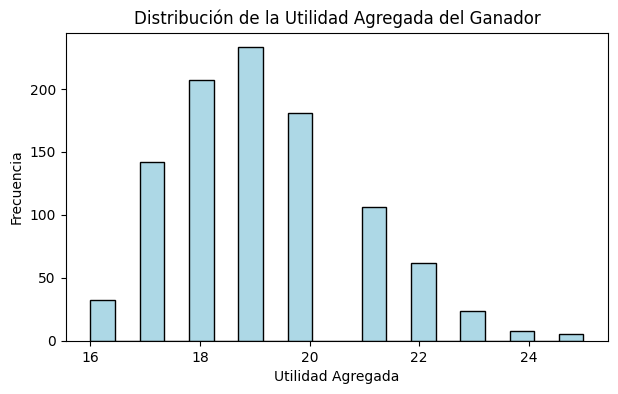

Utilidad media: 19.16, desvío estándar: 1.72

Utilidad del ganador por destino:


/var/folders/rw/9dc4ss41167dpttmz9h6f1xr0000gn/T/ipykernel_79060/3780019440.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="winner_engine", y="winner_utility", data=df_sims, palette="pastel")


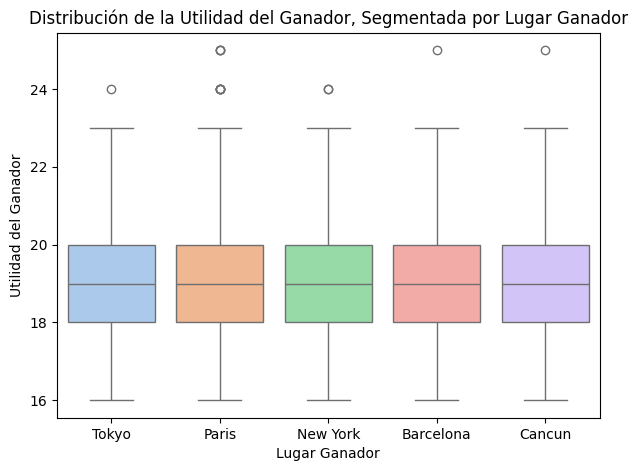

In [45]:
def run_single_simulation(num_people, possible_places, preference_weights):
    """
    1. Generates random preferences.
    2. Validates them.
    3. Calls inference_engine for winner.
    4. Calculates Borda and Condorcet winners.
    5. Calculates winner utility.
    """
    # Generate preferences
    prefs = {}
    for i in range(num_people):
        person_name = f"Persona_{i+1}"
        prefs[person_name] = random.sample(possible_places, len(possible_places))
    
    # Validate
    valid = validate_preferences(prefs, possible_places)
    if not valid:
        return None
    
    # Get winners according to different methods
    chosen_engine = inference_engine(prefs, possible_places, preference_weights)
    chosen_borda = borda_winner(prefs, possible_places)
    chosen_condorcet = find_condorcet_winner(prefs, possible_places)
    
    # Calculate utility
    w_utility = compute_winner_utility(prefs, chosen_engine, possible_places)
    
    # Return simulation data
    sim_data = {
        "preferences": prefs,
        "winner_engine": chosen_engine,
        "winner_borda": chosen_borda,
        "winner_condorcet": chosen_condorcet,
        "winner_utility": w_utility
    }
    return sim_data

def run_many_simulations(num_runs, num_people, possible_places):
    """
    Runs multiple simulations with weighted preferences
    """
    # Define preference weights for all simulations
    preference_weights = {
        0: 1.0,    # First choice worth 100%
        1: 0.7,    # Second choice worth 70%
        2: 0.5,    # Third choice worth 50%
        3: 0.3,    # Fourth choice worth 30%
        4: 0.1     # Last choice worth 10%
    }
    
    records = []
    for i in range(num_runs):
        sim_data = run_single_simulation(num_people, possible_places, preference_weights)
        if sim_data is not None:
            sim_data["simulation_id"] = i + 1
            records.append(sim_data)
    
    df_sims = pd.DataFrame(records)
    return df_sims

# Run the simulation with your parameters
NUM_RUNS = 1000
NUM_PEOPLE = 5
my_places = ["Paris", "Tokyo", "New York", "Barcelona", "Cancun"]

# Execute simulations
df_sims = run_many_simulations(NUM_RUNS, NUM_PEOPLE, my_places)
display(df_sims.head())

# Analyze coincidence with Borda and Condorcet
results = analyze_engine_coincidence(df_sims)
engine_borda_pct = results["engine_borda_coincidence"]
engine_condorcet_pct = results["engine_condorcet_coincidence"]

print(f"\nCoincidencia con Borda: {engine_borda_pct:.2%}")
print(f"Coincidencia con Condorcet (sólo cuando existe): {engine_condorcet_pct:.2%}")

# Count simulations with Condorcet Winner
condorcet_count = df_sims['winner_condorcet'].notna().sum()
print(f"En {condorcet_count} de {len(df_sims)} simulaciones hubo un ganador Condorcet.")

# Calculate average utility
mean_utility = df_sims["winner_utility"].mean()
std_utility = df_sims["winner_utility"].std()
print(f"Utilidad promedio del ganador (engine): {mean_utility:.2f} ± {std_utility:.2f}")

# Optional: Additional visualizations
print("\nDistribución de utilidad del ganador:")
plot_winner_utility_distribution(df_sims)

print("\nUtilidad del ganador por destino:")
boxplot_winner_utility_by_place(df_sims)


# Sistema de Decisión de Destinos de Viaje con Preferencias Ponderadas

## Planteamiento del Problema

El problema consiste en decidir un destino de viaje para un grupo de personas, donde cada individuo tiene **preferencias variadas** sobre los posibles destinos. El objetivo es seleccionar un destino que maximice la satisfacción del grupo, teniendo en cuenta las preferencias individuales y asignando un peso a cada preferencia según su posición en la lista de cada persona.

### Características del Problema:

- **Preferencias individuales**: Cada persona tiene un ranking de destinos preferidos.
- **Ponderación de preferencias**: Las preferencias tienen un peso decreciente (la primera opción tiene más valor que la segunda, y así sucesivamente).
- **Múltiples métodos de decisión**: Se comparan los resultados del algoritmo propuesto con métodos clásicos como Borda y Condorcet para evaluar su eficacia.

---

## Algoritmo Propuesto: Ponderación de Preferencias

El algoritmo utiliza un sistema de **puntos ponderados** para asignar un valor a cada preferencia de los participantes. Los pesos asignados son los siguientes:

| Posición de Preferencia | Peso |
|-------------------------|------|
| Primera opción          | 1.0  |
| Segunda opción          | 0.7  |
| Tercera opción          | 0.5  |
| Cuarta opción           | 0.3  |
| Quinta opción           | 0.1  |

### Pasos del Algoritmo:

1. **Generación de preferencias**:
   - Cada persona asigna un ranking de preferencias sobre los destinos disponibles.
   - Se generan preferencias aleatorias para simular diferentes escenarios.

2. **Validación de preferencias**:
   - Se verifica que las preferencias sean válidas (es decir, que todos los destinos estén presentes en cada ranking).

3. **Cálculo del ganador**:
   - Se utiliza un **motor de inferencia** para calcular el destino ganador basado en los pesos asignados.
   - También se calculan los ganadores según los métodos de **Borda** y **Condorcet** para comparación.

4. **Cálculo de la utilidad del ganador**:
   - Se mide la satisfacción del grupo con el destino seleccionado, calculando la utilidad promedio basada en las preferencias ponderadas.

---

## Evaluación del Algoritmo

Para evaluar la eficacia del algoritmo, se utilizan las siguientes métricas:

1. **Coincidencia con Borda y Condorcet**:
   - Se compara el destino seleccionado por el algoritmo con los ganadores de los métodos de Borda y Condorcet.
   - Se calcula el porcentaje de coincidencia entre los resultados.

2. **Utilidad del ganador**:
   - Se mide la satisfacción promedio del grupo con el destino seleccionado.
   - Se calcula la utilidad promedio y su desviación estándar para evaluar la consistencia del algoritmo.

3. **Distribución de la utilidad**:
   - Se analiza cómo se distribuye la utilidad del ganador en diferentes simulaciones.
   - Se visualiza la utilidad por destino para identificar patrones.

---

## Simulación y Resultados

El proceso de simulación se realiza de la siguiente manera:

1. **Ejecución de múltiples simulaciones**:
   - Se ejecutan `N` simulaciones con un número fijo de personas y destinos posibles.
   - En cada simulación, se generan preferencias aleatorias y se calculan los ganadores.

2. **Análisis de resultados**:
   - Se calcula la coincidencia del algoritmo con Borda y Condorcet.
   - Se cuenta cuántas simulaciones tuvieron un ganador de Condorcet.
   - Se calcula la utilidad promedio del ganador y su desviación estándar.

3. **Visualización de resultados**:
   - Se generan gráficos para visualizar la distribución de la utilidad del ganador.
   - Se analiza la utilidad por destino para identificar tendencias.

---
